# Objective
Create a machine learning model using linear regression and Boston housing dataset while following the machine learning workflow.

# Project Context
In machine learning we write computer programs which automatically improve with experience which are termed as machine learning models. It saves us from explicitly writing code for complex real world data.

In this project we are going to use supervised learning, which is a branch of machine learning where we teach our model by examples. Here we will first explore different attributes of Boston housing dataset then a part of dataset will be used to train the linear regression algorithm after that we will use the trained model to give predictions on remaining part of dataset.

# Approach

# Importing libraries and dataset
In this section we will load a few libraries which we will need to develop, visualize and test our model. We will also be loading our dataset for one of the imported libraries named Sklearn.

# Requirements

Import the stated libraries:

Numpy

Pandas

Sklearn

matplotlib.plt

Seaborn

Import Boston housing dataset from Sklearn using the following command.

In [585]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
plt.style.use(['dark_background'])

In [586]:
from sklearn.datasets import load_boston
var = load_boston()

# Data exploration and preprocessing
In this section we will analyse our dataset using different methods and then we'll create a dataframe using the same. We will also carry out preprocessing on the dataframe for using the linear regression model.

In [587]:
df = pd.DataFrame(var.data, columns=var.feature_names)

In [588]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


1. Use functions head() and tail() to see first and last five rows of the created dataframe.

2. Use describe() to get even further insights on the created data frame.

3. Add another column to the dataframe and store the value of target attribute in it df['MEDV'] = var.target Confirm the addition of column using head().

4. Use df.dtype or df.info to know data type various features present in the dataset. If we find categorical data, then we'll require to use different encoding methods.

5. Use df.isnull().sum() to check for missing values in each column. If we find missing values, then either we will place values there or we can drop the row or column.

6. Create a heatmap using seaborn to find corelation between different features and labels. In model creation we will be using features having a high corelation with our target label.

7. Create KDE plot of different variables using seaborn library.

In [589]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [590]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [591]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [592]:
df['MEDV'] = var.target

In [593]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [594]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [595]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [596]:
df = df.drop(["ZN", "CHAS"], axis = 1)
df.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [597]:
df.columns

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [598]:
df.shape

(506, 12)

In [599]:
#lets make the correlation matrix
corr_data = df.corr()
corr_data.style.background_gradient(cmap="coolwarm")

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
INDUS,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,0.720760,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.441808,-0.177383,1.000000,-0.366087,0.333461


In [600]:
#as per the above correlation matrix we can see that Tax & RAD are highly correlated,
#as per the observation of data Rad is more important variable in predicting the Medv so I am dropping Tax here

df = df.drop(["TAX"], axis = 1)
df.shape

(506, 11)

In [601]:
#lets make the correlation matrix again
corr_data = df.corr()
corr_data.style.background_gradient(cmap='viridis')

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.289946,-0.385064,0.455621,-0.388305
INDUS,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,0.595129,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.464741,-0.444413,0.488676,-0.381626
PTRATIO,0.289946,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.464741,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.444413,-0.177383,1.000000,-0.366087,0.333461
LSTAT,0.455621,0.603800,0.590879,-0.613808,0.602339,-0.496996,0.488676,0.374044,-0.366087,1.000000,-0.737663


In [602]:
#now after dropping RAD we have noticed that NOX and INDUS are highly correlated and as per the observation of data it is suggested to drop INDUS rather than NOX in respect to MEDV
df= df.drop(["NOX", "B"], axis=1)
df.shape

(506, 9)

In [603]:
#"indigo"
corr_data = df.corr()
corr_data.style.background_gradient(cmap='plasma')
#'viridis', 'plasma', 'inferno', 'magma', 'cividis'

,CRIM,INDUS,RM,AGE,DIS,RAD,PTRATIO,LSTAT,MEDV
CRIM,1.000000,0.406583,-0.219247,0.352734,-0.379670,0.625505,0.289946,0.455621,-0.388305
INDUS,0.406583,1.000000,-0.391676,0.644779,-0.708027,0.595129,0.383248,0.603800,-0.483725
RM,-0.219247,-0.391676,1.000000,-0.240265,0.205246,-0.209847,-0.355501,-0.613808,0.695360
AGE,0.352734,0.644779,-0.240265,1.000000,-0.747881,0.456022,0.261515,0.602339,-0.376955
DIS,-0.379670,-0.708027,0.205246,-0.747881,1.000000,-0.494588,-0.232471,-0.496996,0.249929
RAD,0.625505,0.595129,-0.209847,0.456022,-0.494588,1.000000,0.464741,0.488676,-0.381626
PTRATIO,0.289946,0.383248,-0.355501,0.261515,-0.232471,0.464741,1.000000,0.374044,-0.507787
LSTAT,0.455621,0.603800,-0.613808,0.602339,-0.496996,0.488676,0.374044,1.000000,-0.737663
MEDV,-0.388305,-0.483725,0.695360,-0.376955,0.249929,-0.381626,-0.507787,-0.737663,1.000000


#Outlier treatment

# Bring it On!
In normalization we rescale numeric values of attributes to the range [1,0]. Create another dataframe and perform all the above steps followed by normalization of data.
After model implementation check the effect of normalization on the accuracy of the model
Instead of heatmap try to create a bar graph to identify collinearity.



# Expected Outcome
On completion of this milestone, you should be able to achieve the following:
A dataframe being created and a new column having value of target being added to it .
Data being observed and understood using different methods
Different aspects of data being visualized for a better understanding.
Using heatmap features having high corelation with the target label had been identified.

# Model Implementation
Lets implement the Machine learning models As we know that this is a regression a problem as we have to predict a continous (non catagorical) value.

In [604]:
 #importing dataset
X = df.iloc[:, :-1] #independent variable
y = df.iloc[:, 8] #dependent variable

In [605]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [606]:
#Use train_test split() from Sklearn to create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [607]:
#Use regression on training data

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
329,22.6,28.561860
371,50.0,22.269523
219,23.0,25.947354
403,8.3,11.058680
78,21.2,21.536530
...,...,...
56,24.7,25.430034
455,14.1,18.580450
60,18.7,16.897324
213,28.1,25.628581


In [608]:
score=regressor.score(X_test, y_test)*100
print ("R2 scores is = ", score )

R2 scores is =  51.75206891492069


In [609]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.176053919653243


# Polynomial Regression

In [610]:
#fitting polynomial regression.....WHEN WE USE POLYNOMIAL REGRESSION WE HAVE TO FIT DATASET IN LINEAR REGRESSION FIRST
from sklearn.preprocessing import PolynomialFeatures
polyReg = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = polyReg.fit_transform(X_train)
X_test_poly = polyReg.fit_transform(X_test)
poly = LinearRegression()
poly.fit(X_train_poly, y_train)
y_pred = poly.predict(X_test_poly)
y_compare_poly = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
accuracy = cvs(poly, X_train_poly, y_train, scoring='r2', cv=5)
print (accuracy.mean())
y_compare.head()

0.8363923881920708


,Actual,Predicted
RAD,0.464741,0.472859
MEDV,-0.507787,-0.476545
AGE,0.261515,0.284608


In [611]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 160, random_state = 0)
dt=RF.fit(X_train, y_train)
y_pred =dt.predict(X_test)
y_compare_RF = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
accuracy = cvs(RF, X_train, y_train, scoring='r2', cv=5)
print (accuracy.mean())
y_compare_RF.head()

0.8427015699706766


,Actual,Predicted
329,22.6,24.221250
371,50.0,28.831250
219,23.0,21.627500
403,8.3,12.181250
78,21.2,21.079375


# Model Testing
In this section we will test our prediction with testing data and calculate R2 score to measure model accuracy. We will also plot the results of the linear regression model.

In [612]:
score=RF.score(X_test, y_test)*100
print ("R2 scores is = ", score )

R2 scores is =  74.73692160035328


In [614]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 2.7946446078431366


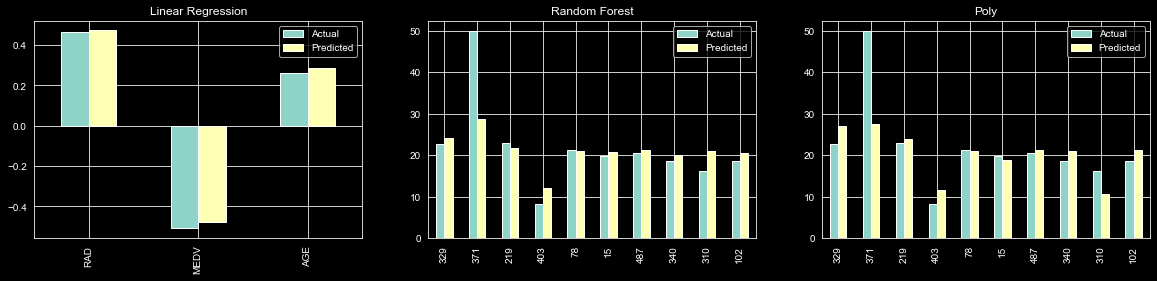

In [613]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,4))
ax = ax.flatten()
y_compare.head(10).plot(kind='bar', title='Linear Regression', grid='True', ax=ax[0])
y_compare_RF.head(10).plot(kind='bar', title='Random Forest', grid='True', ax=ax[1])
y_compare_poly.head(10).plot(kind='bar', title='Poly', grid='True', ax=ax[2])